In [1]:
%load_ext autoreload
%autoreload 2

# Importing functions

In [2]:
from data_utils import read_mtx
from graph_utils import plot_graph, graph_info, plot_degree_distribution, highlight_nodes, plot_edge_betweenness
from graph_utils import get_farthest_points, plot_path_length_distribution
from algorithms import agglomerative_hierarchical, girvan_newman, modularity
import networkx as nx
from matplotlib import pyplot as plt
import operator

# C. elegans metabolic network

Nodes are substrates and the edges are metabolic reactions.

### Loading file

In [3]:
g = read_mtx('bio-celegans.mtx')

### Network characteristics

In [4]:
graph_info(g);

Num nodes:  453
Num edges:  2024
Avg degree:  8.936
Clustering coef:  0.6463
Modularity:  0.051


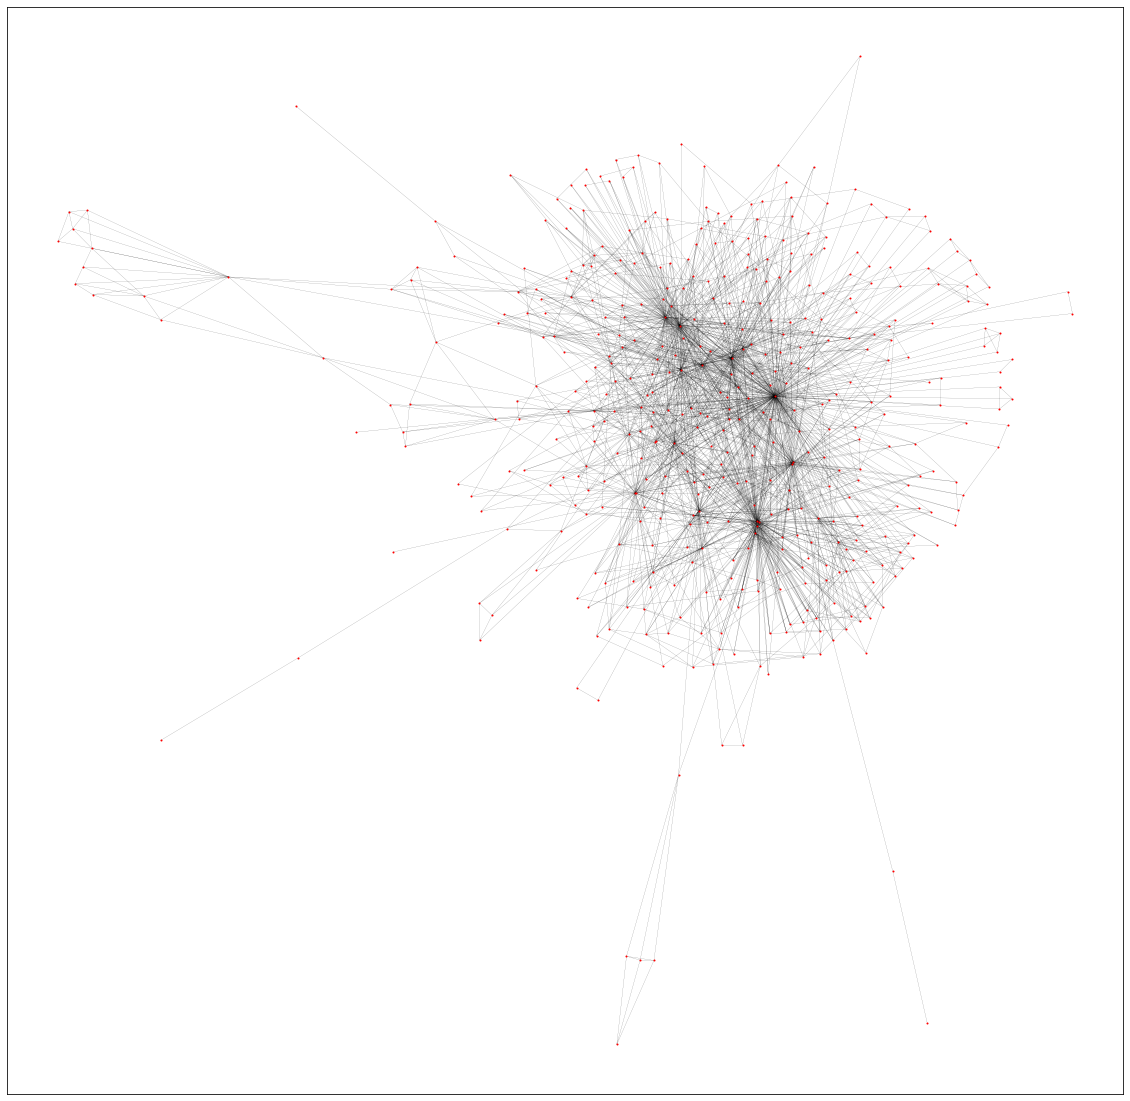

In [5]:
plot_graph(g)

### Degree distribution

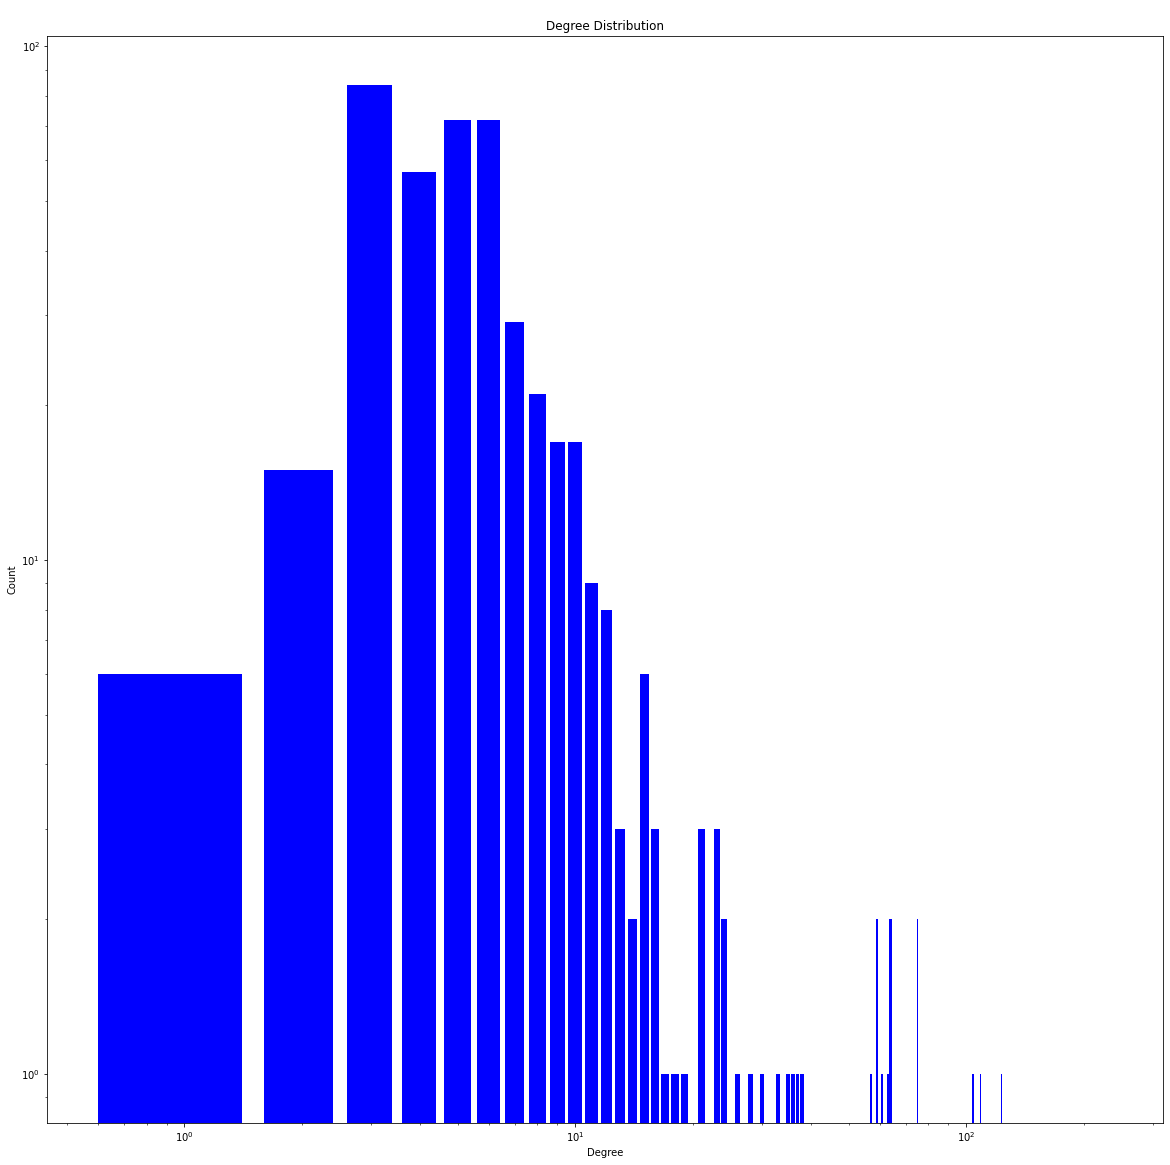

In [6]:
plot_degree_distribution(g)

### Closest path length distribution

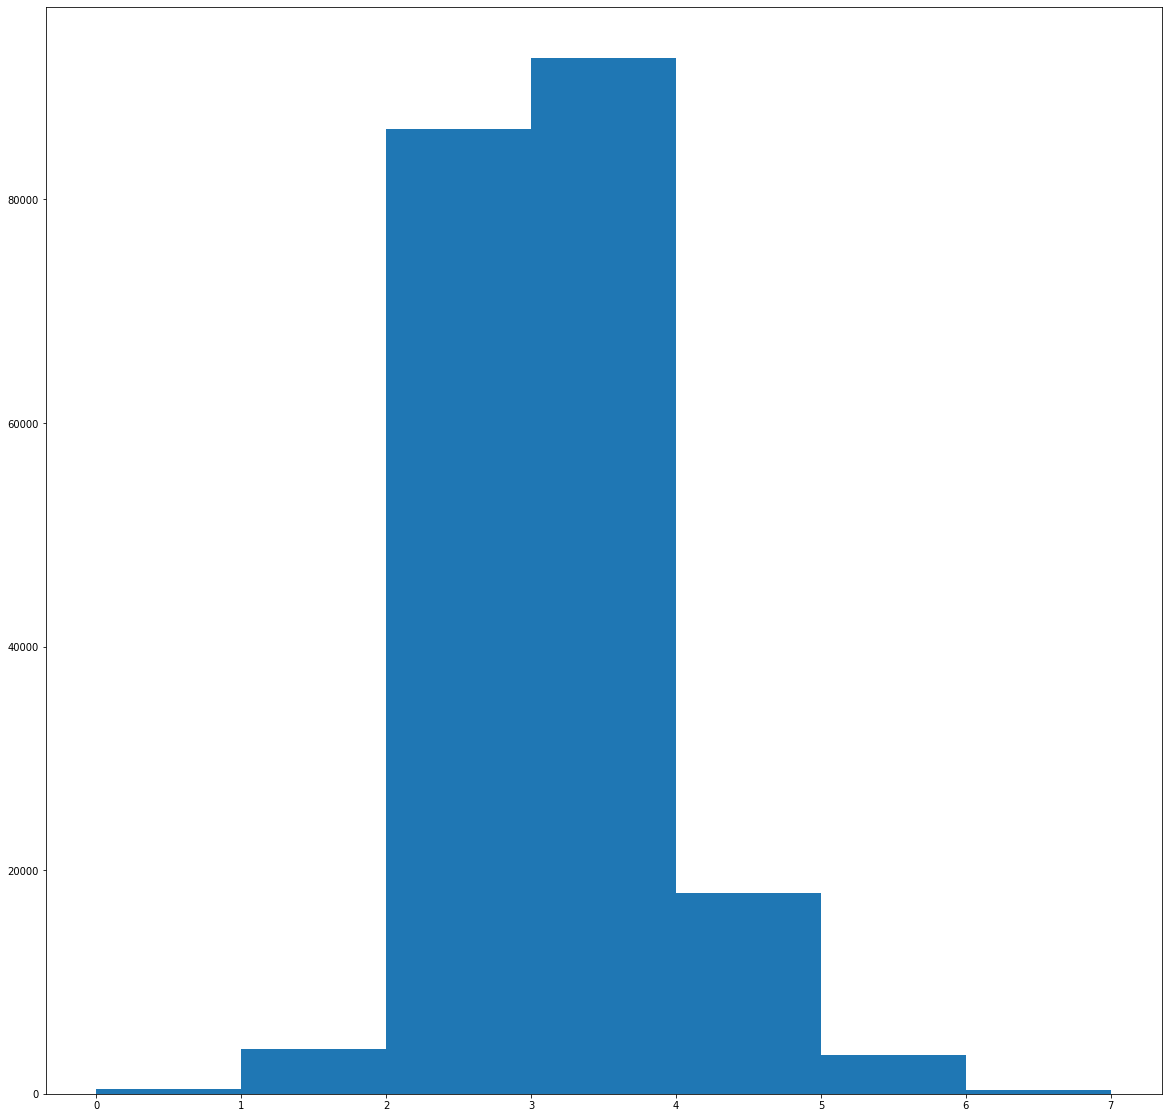

In [7]:
plot_path_length_distribution(g)

### Farthest points

In [8]:
get_farthest_points(g)

('15', '225', 7)

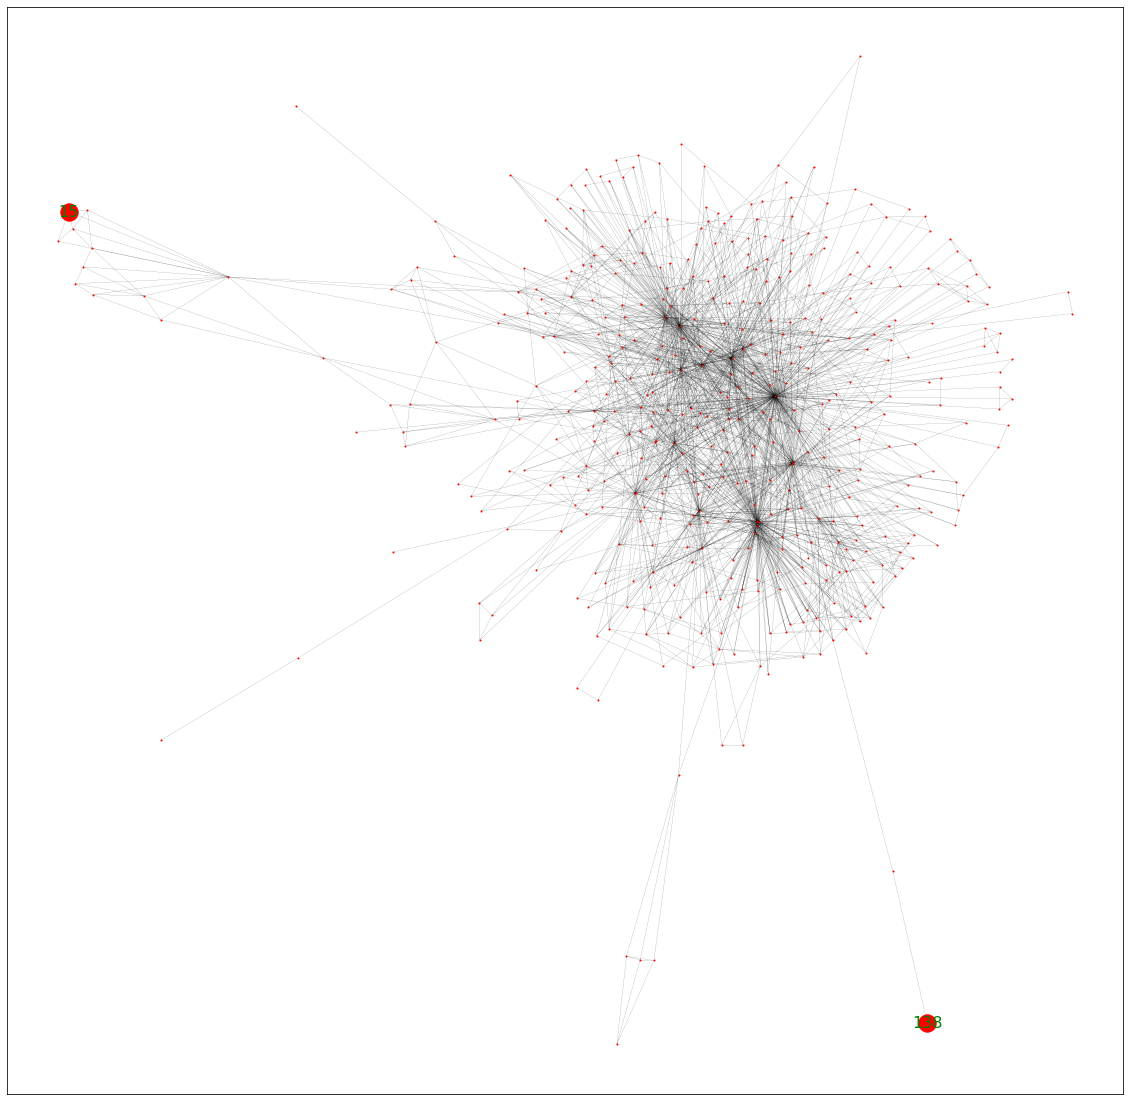

In [9]:
highlight_nodes(g, ['15', '138'])

## Synthetic graph

```I. Ispolatov, P. L. Krapivsky, A. Yuryev, “Duplication-divergence model of protein interaction network”, Phys. Rev. E, 71, 061911, 2005.
```

Returns an undirected graph using the duplication-divergence model.
A graph of n nodes is created by duplicating the initial nodes and retaining edges with a retention probability p.
This implementation disallows the possibility of generating disconnected graphs.

In [10]:
G=nx.duplication_divergence_graph(100, 0.7, seed=0)

In [11]:
graph_info(G);

Num nodes:  100
Num edges:  311
Avg degree:  6.22
Clustering coef:  0.0
Modularity:  0.4639


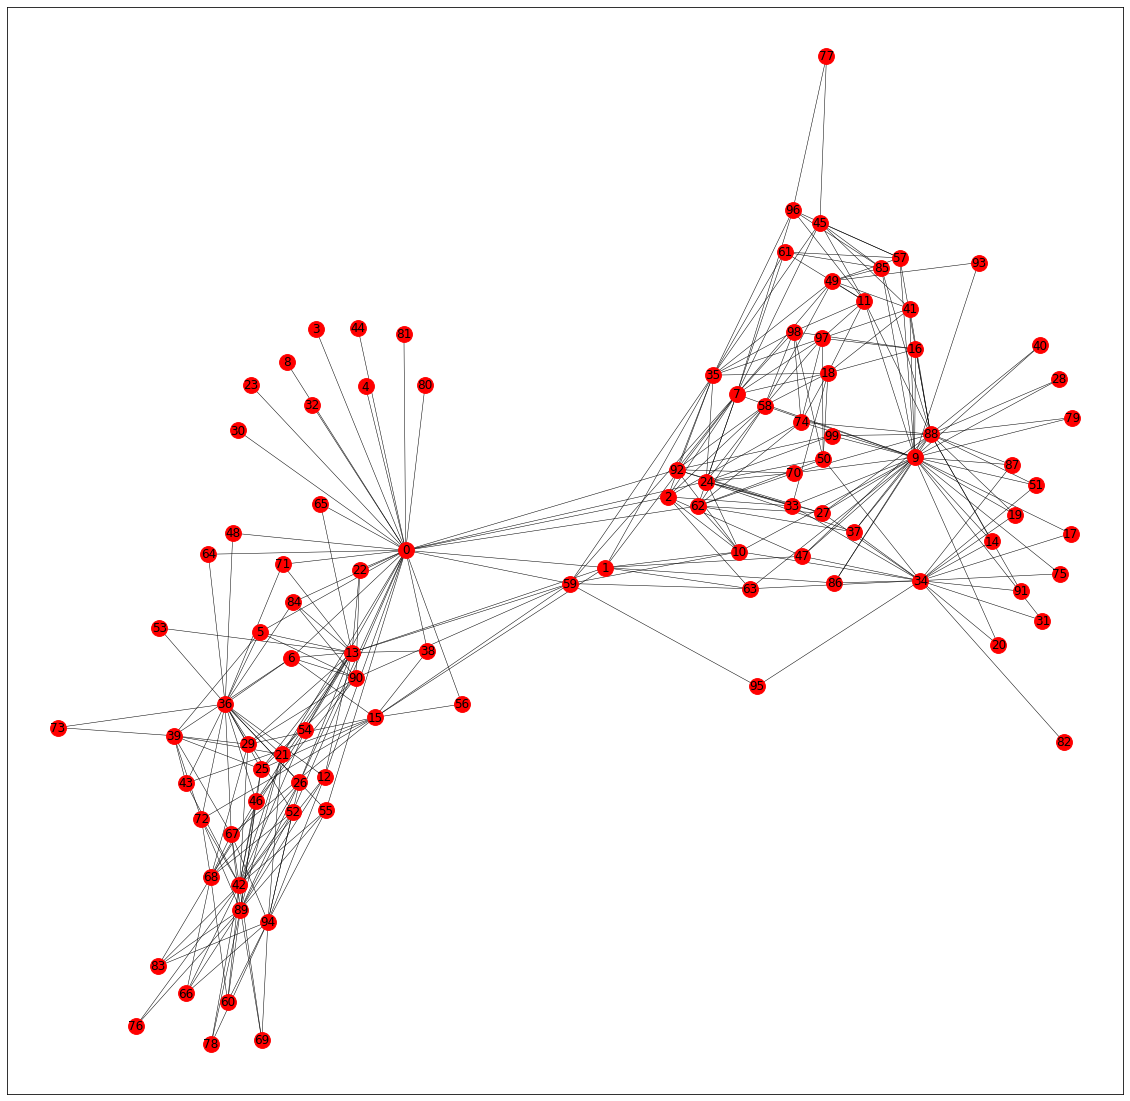

In [12]:
plot_graph(G, width=0.5, size=250, labels=True)

## Agglomerative Hierarchical Method

First create a distance matrix $D$, which is a matrix that provides the distance between two nodes $i$ and $j$ in network $G$. Using $D$, perform hierarchical clustering in a recursive manner, group similar nodes at each step. Similarity grouping is done using average distance between the nodes.

Total  6 clusters detected.


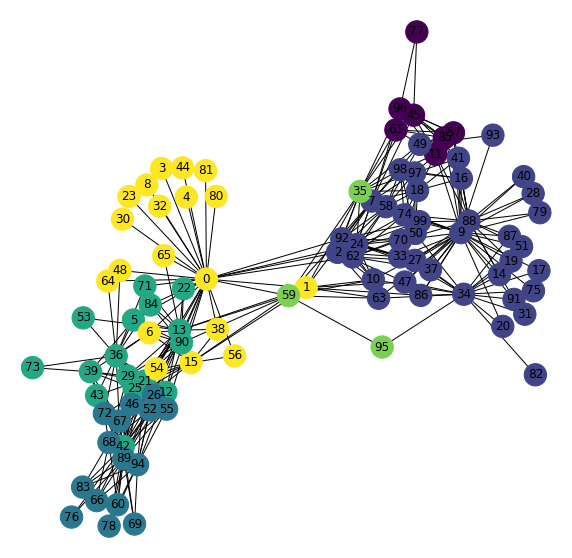

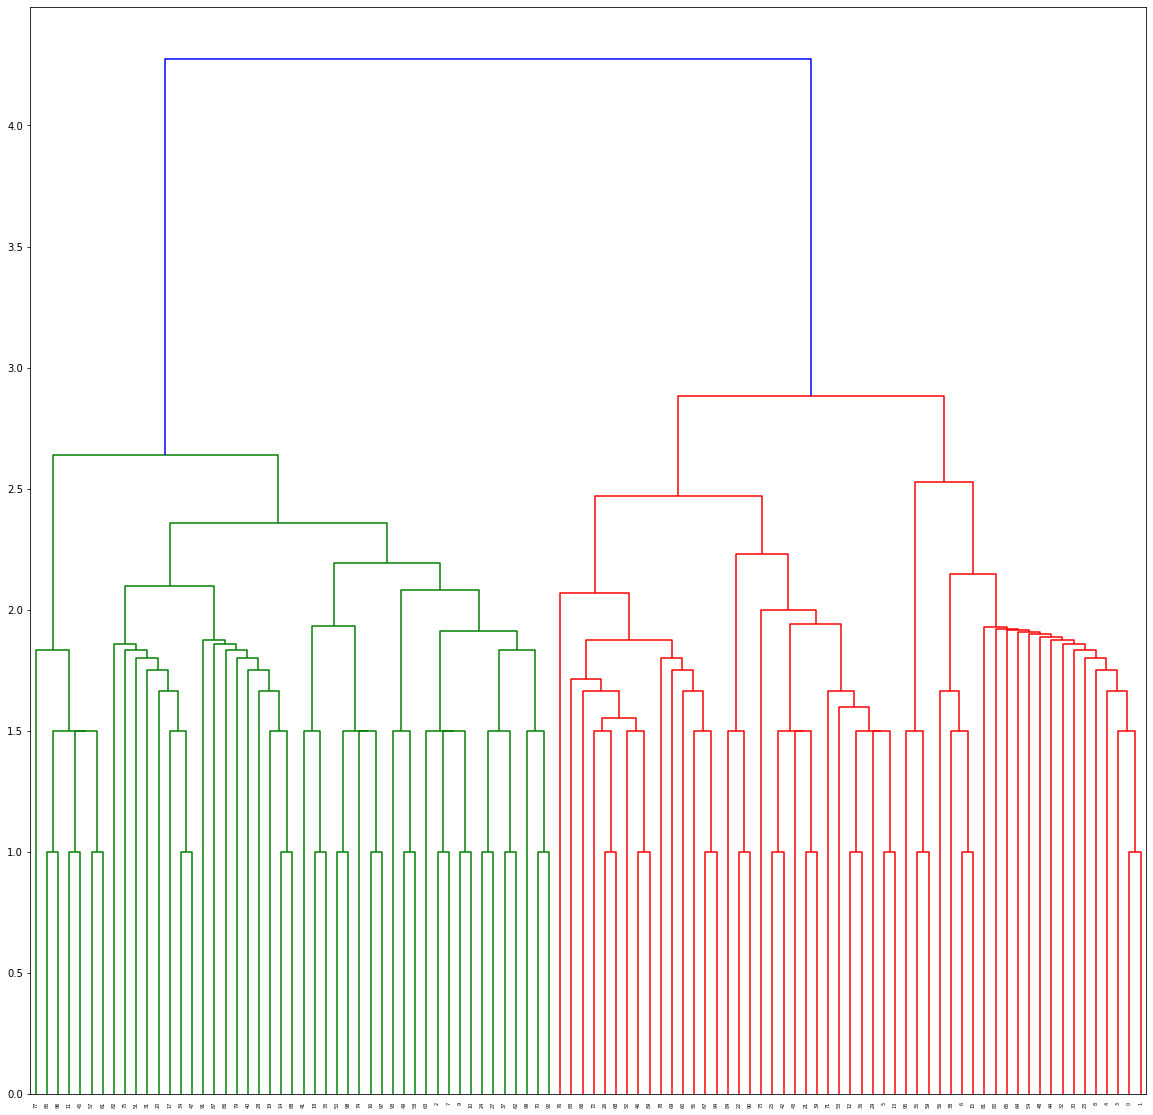

In [13]:
agglomerative_hierarchical(G)

# Girvan-Newman Algorithm

The betweenness of an edge $e$ is the fraction of shortest-paths that course through it.

$$c_B(e)=\sum _{i,j \in V}\frac{\sigma (i,j)|e}{\sigma (i,j)},$$
where $\sigma(i,j)$ is the total number of shortest paths and $\sigma (i,j)|e$ is the number of shortest paths that pass through edge $e$.

### Edge betweenness distribution

Pairs with highest betweennes:
(0, 24): 0.08018288394725398
(0, 62): 0.0688525757479885
(0, 92): 0.06330945499289281


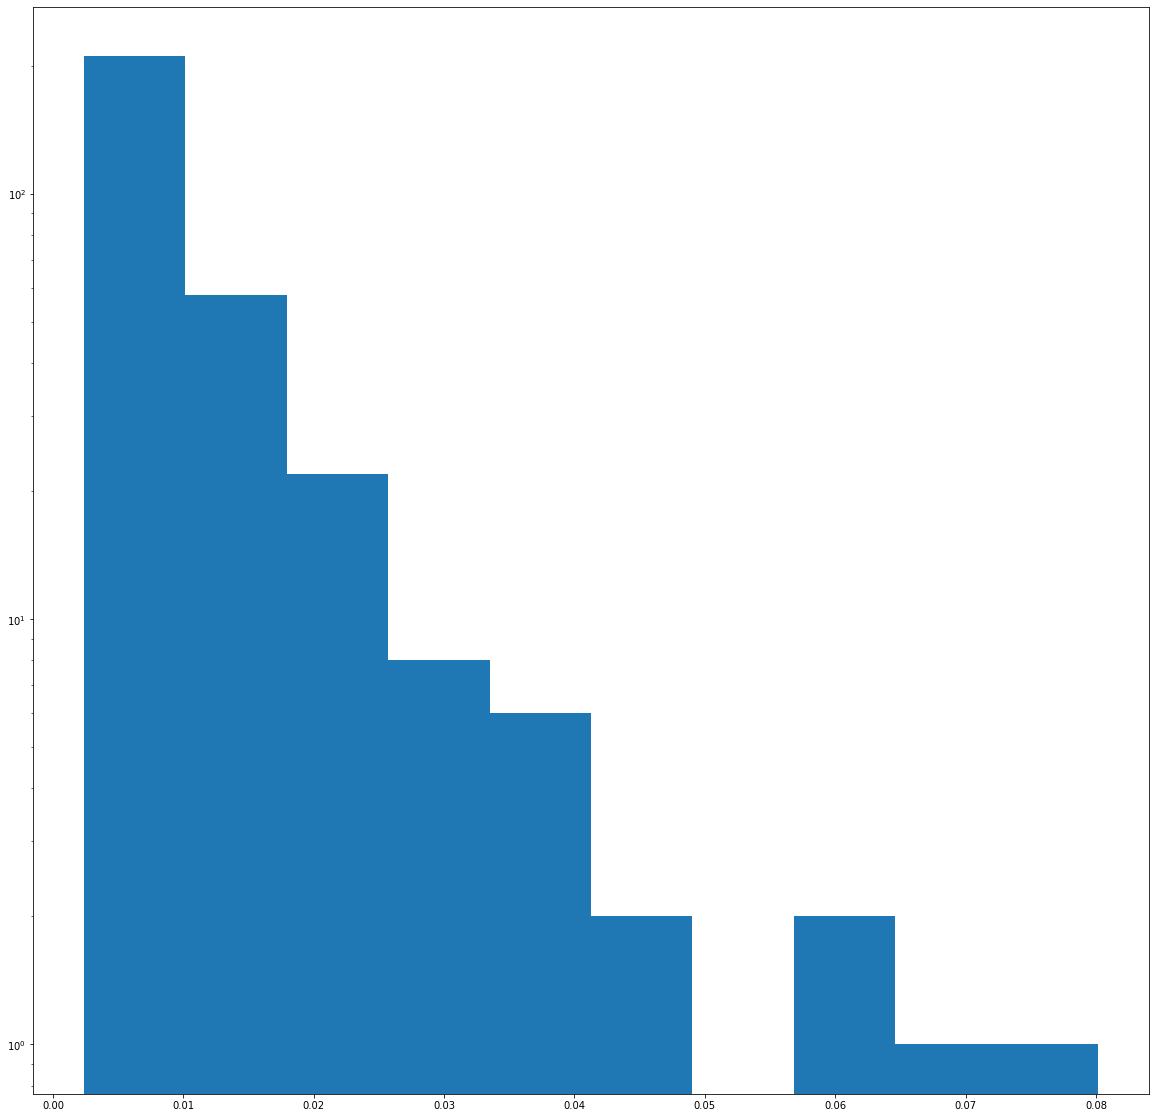

In [14]:
plot_edge_betweenness(G)

### Clustering with threshold six

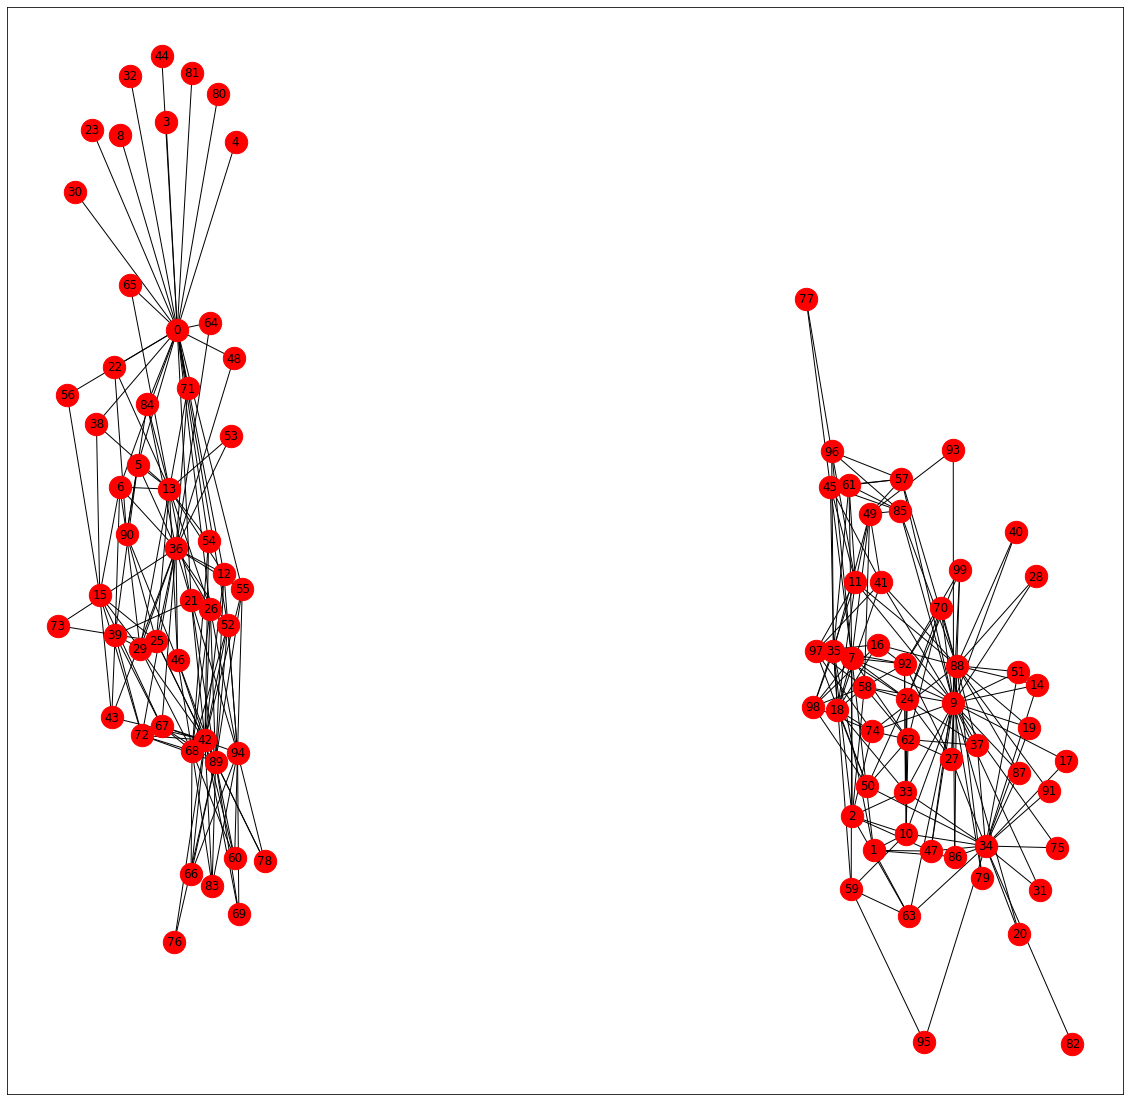

In [15]:
girvan_newman(G, thresh=11)

### Clustering with threshold 100

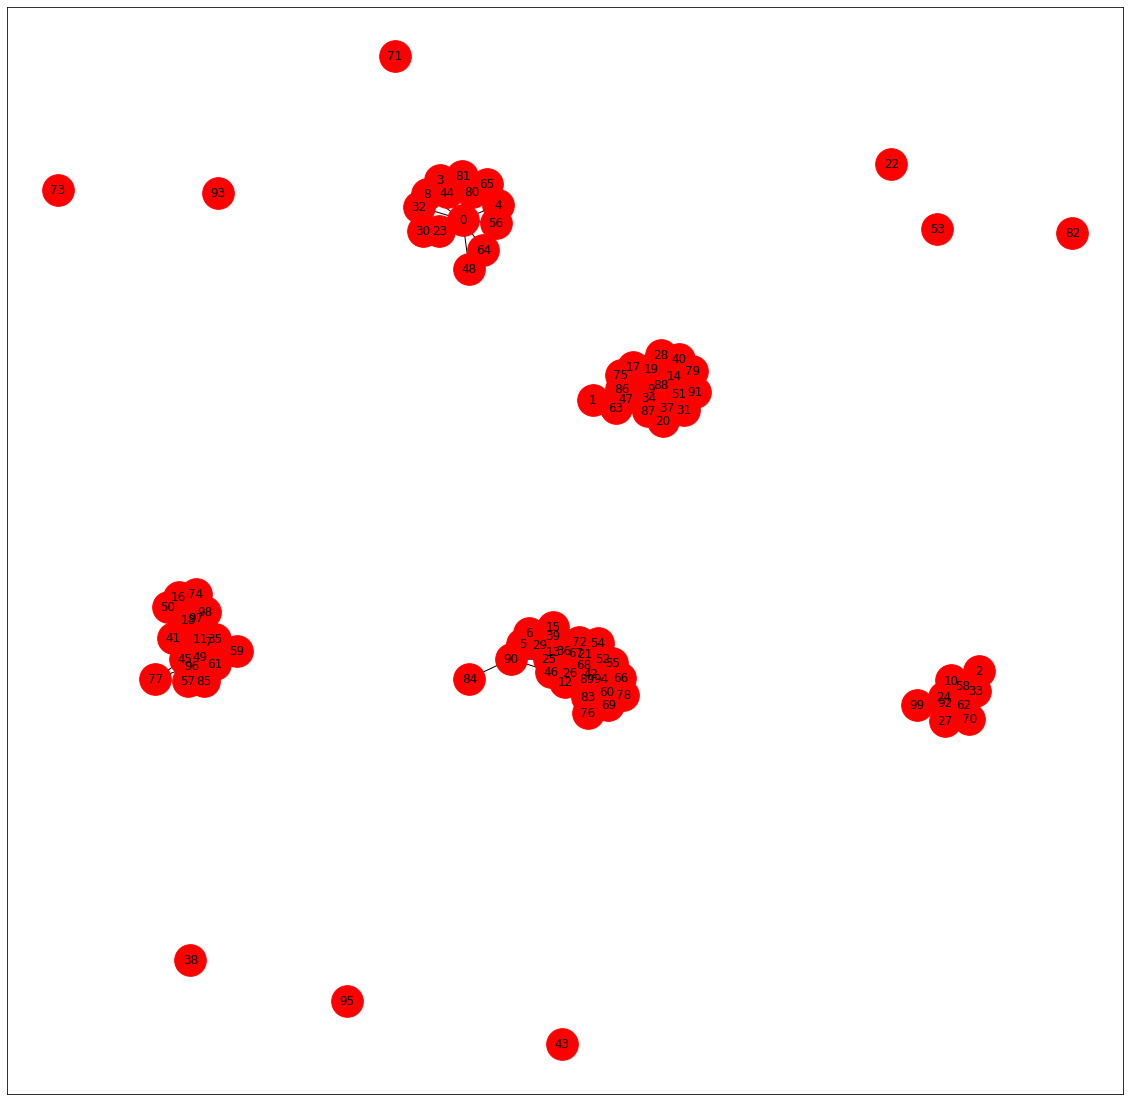

In [16]:
girvan_newman(G, thresh=100, size=1000)

# Modularity

The modularity $M_c$ quantifies how good a "community" or partition is, and is given by

$$
M_c = \sum _{c=1} ^{n_c} \left[ \frac{L_c}{L} - \left (\frac{k_c}{2L} \right)^2\right]
$$
where $n_c$ is the number of communiies, $L_c$ is the number of links within the community, $k_c$ is the total degree of nodes belonging to the community, and $L$ is the total number of links in the network.

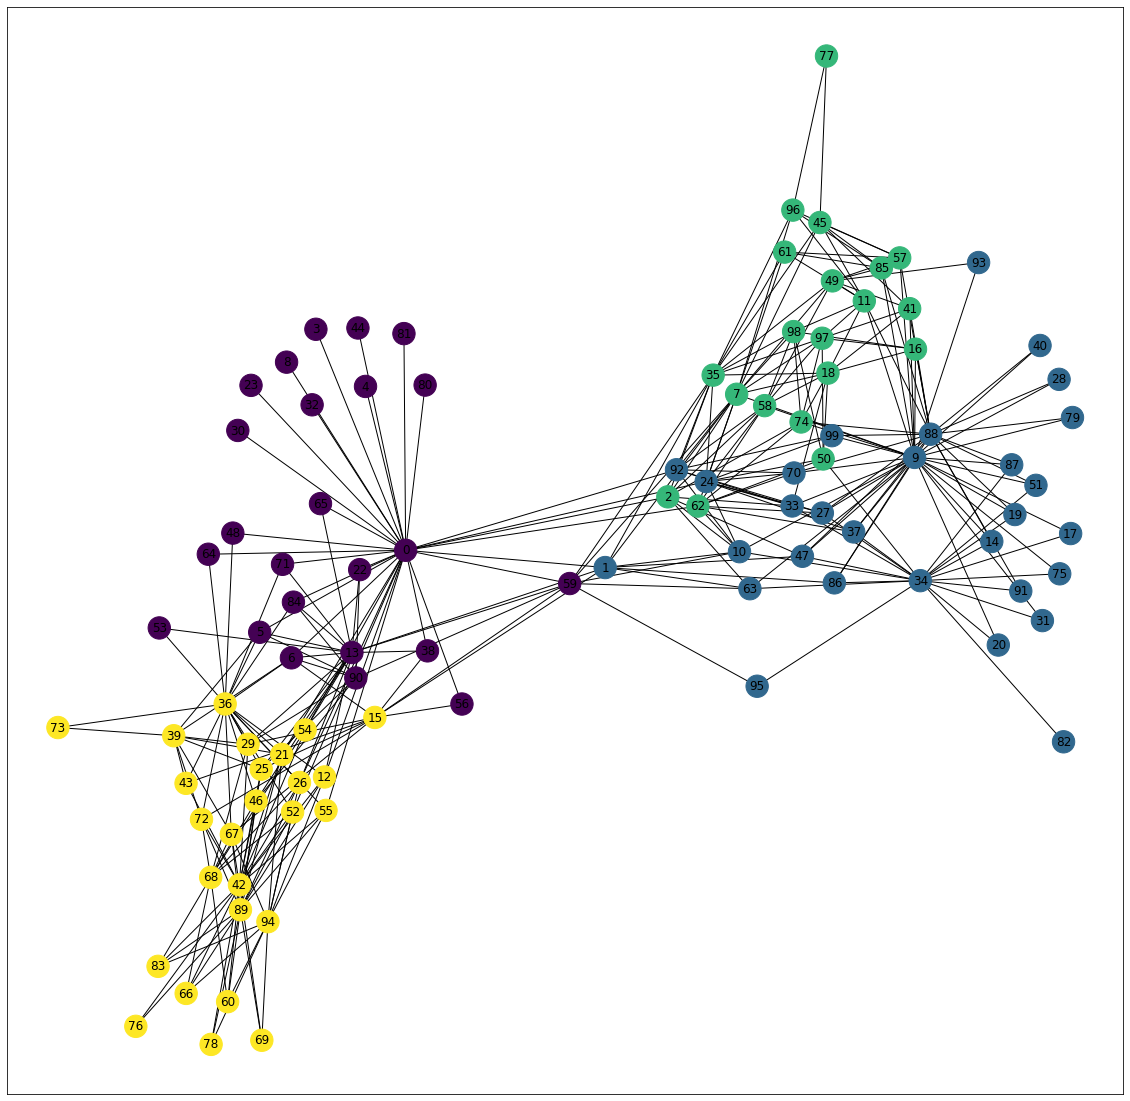

In [17]:
modularity(G, thresh=1)